# Deri Kanseri Sınıflandırması(Resimli Sınıflandırma)

In [ ]:
import cv2
import pandas as pd
import os

In [ ]:
pip install opencv-python

In [ ]:
labels=['Cancer','Non_Cancer']
img_path='Skin_Data/'

In [ ]:
img_list=[]
label_list=[]
for label in labels:
    for img_file in os.listdir(img_path+label):
        img_list.append(img_path+label+'/'+img_file)
        label_list.append(label)

In [ ]:
df=pd.DataFrame({'img':img_list,'label':label_list})

In [ ]:
df.head()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
d={'Cancer':1,'Non_Cancer':0}

In [ ]:
#labelencoder.fit_tran #eğer labellar 2'den fazla ise label encoder import edilip kullanılması gerekir.

In [ ]:
df['encode_label']=df['label'].map(d)

In [ ]:
df.tail()

In [ ]:
df.head()

In [ ]:
df.drop( df[df['img'] == 'Skin_Data/Non_Cancer/.DS_Store'].index , inplace=True)
df.drop( df[df['img'] == 'Skin_Data/Cancer/.DS_Store'].index , inplace=True)

In [12]:
import numpy as np

In [ ]:
x = []
for img in df['img']:
    image = cv2.imread(img)
    if image is not None:
        image = cv2.resize(image, (170, 170))  #boyutunu 170 x 170 piksel yaptık
        image = image / 255.0  #normalize ettik

In [ ]:
x=np.array(x)

In [ ]:
y=df['encode_label']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, InputLayer, MaxPooling2D, Dropout,BatchNormalization, Reshape

In [ ]:
# CNN - Convolutional Neural Network
model = Sequential()
model.add(Input(shape=(170, 170, 3)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(2, activation='softmax')) # 2 different classes
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, verbose=1)

# Transfer Learning

Makina öğrenmesinden sonra makinayı olan bilgileriyle tekrar eğitme

In [1]:
#VGGNET, ResNet, Inceptionv3, Xception, MobileNetv2

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization, Reshape
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
data_dir = 'Skin_Data'
img_width, img_height = 224, 224

train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_datagenerator = train_datagen.flow_from_directory(directory=data_dir, target_size=(img_width, img_height), 
                                   class_mode='binary', subset='training')

test_datagenerator = train_datagen.flow_from_directory(directory=data_dir, target_size=(img_width, img_height), 
                                   class_mode='binary', subset='validation')

base_model = ResNet50(weights='imagenet', input_shape=(img_width, img_height, 3), include_top=False)
model = Sequential()
model.add(base_model)
for layer in base_model.layers:
    layer.trainable = False
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_datagenerator, epochs=10, validation_data=test_datagenerator)

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 91s 1us/step
Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.5325 - loss: 21.5659 - val_accuracy: 0.2857 - val_loss: 18.4413
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.3402 - loss: 11.9634 - val_accuracy: 0.7143 - val_loss: 2.7091
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.6988 - loss: 2.8825 - val_accuracy: 0.7143 - val_loss: 1.2714
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.5555 - loss: 1.0500 - val_accuracy: 0.6071 - val_loss: 0.6909
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.6814 - loss: 0.6675 - val_accuracy: 0.7143 - val_loss: 0.7408
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.6792 - loss: 0.6793 - val_accuracy: 0.7500 - val_loss: 0.6518
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7253 - loss: 0.6255 - val_accuracy: 0.7143 - val_loss: 0.5943
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.7117 - loss: 0.5903 - val_accuracy: 0.7321 - val_loss: 0.5981
Epoch 9/10
8/8 ━

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │   102,761,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 331,875,205 (1.24 GB)

 Trainable params: 102,762,497 (392.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 205,524,996 (784.02 MB)

In [7]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from IPython.display import Image

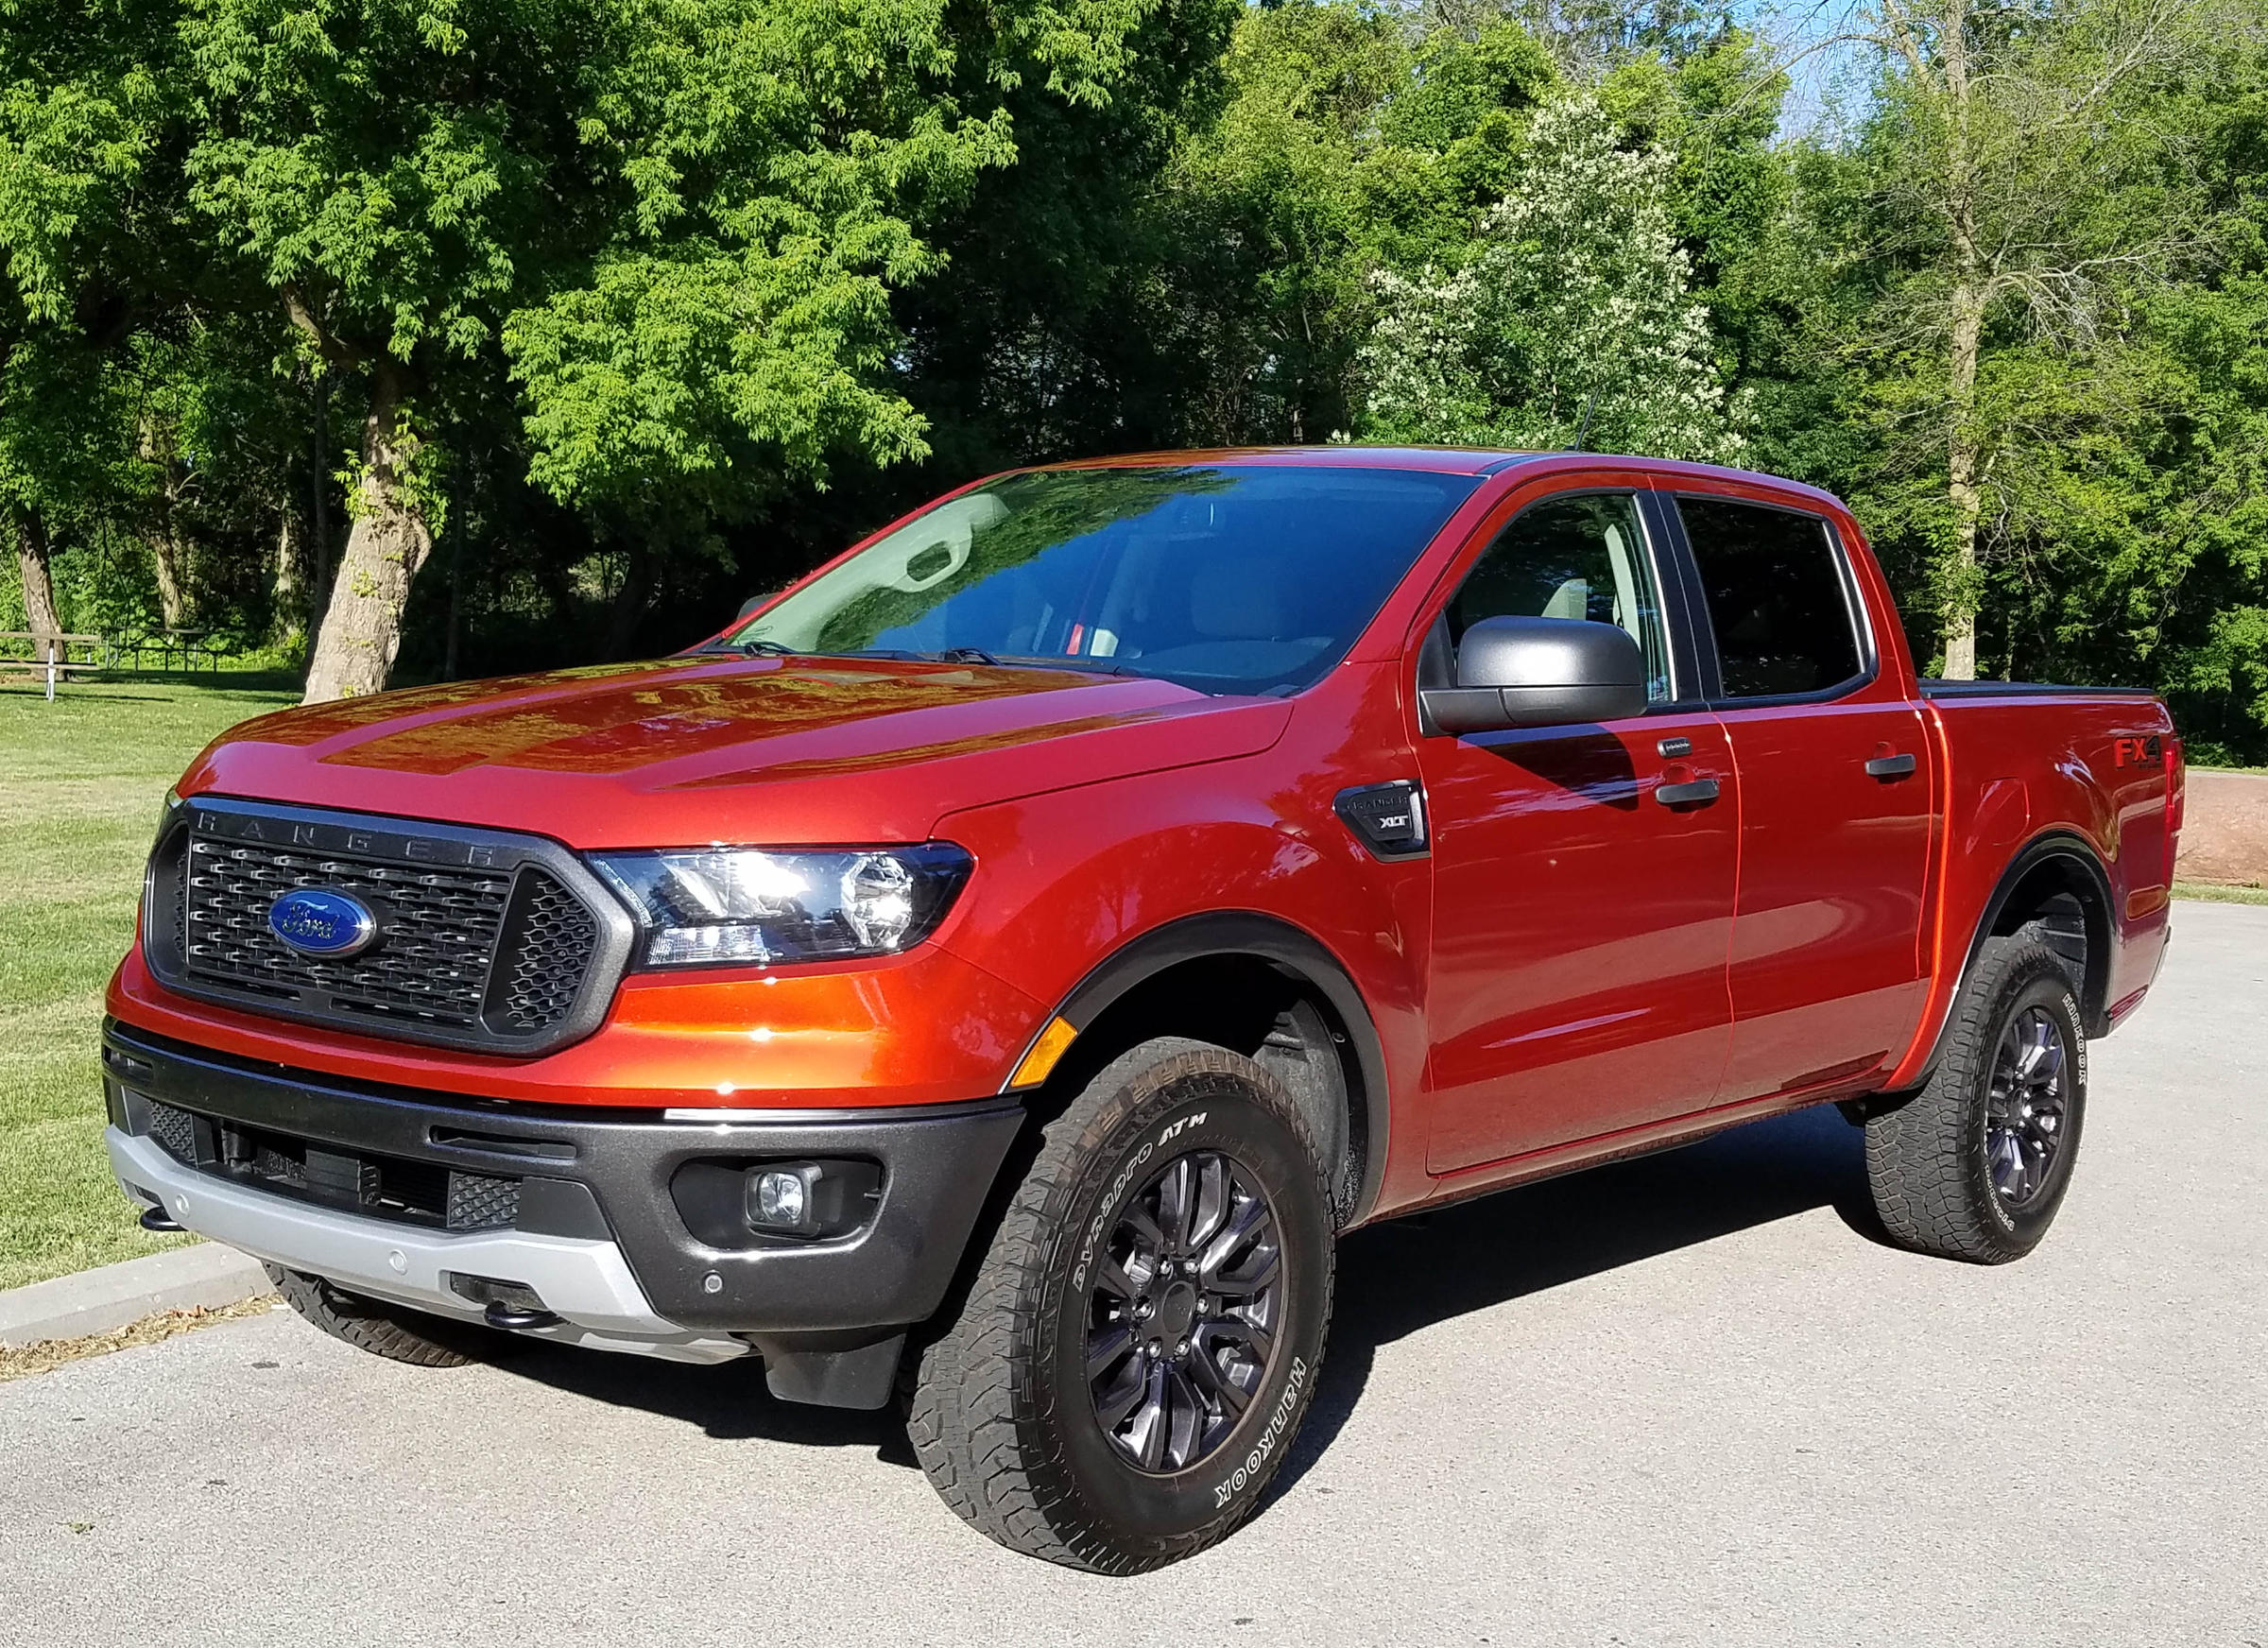

In [10]:
Image('Ford Ranger.jpg')

In [13]:
img = image.load_img('Ford Ranger.jpg', target_size=(img_width, img_height))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img);

In [14]:
model=ResNet50(weights='imagenet')

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 73s 1us/step


In [15]:
pred=model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 573ms/step


In [16]:
decode_predictions(pred, top=1)

35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step


[[('n03930630', 'pickup', 0.90949136)]]